Level_2, Task_1:
## Linear Regression


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
df = pd.read_csv(r"C:\Users\SRIYAVARDHINI\Downloads\4) house Prediction Data Set.csv", sep=r'\s+')
df.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [61]:
## Data Cleaning ##
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0.00632  505 non-null    float64
 1   18.00    505 non-null    float64
 2   2.310    505 non-null    float64
 3   0        505 non-null    int64  
 4   0.5380   505 non-null    float64
 5   6.5750   505 non-null    float64
 6   65.20    505 non-null    float64
 7   4.0900   505 non-null    float64
 8   1        505 non-null    int64  
 9   296.0    505 non-null    float64
 10  15.30    505 non-null    float64
 11  396.90   505 non-null    float64
 12  4.98     505 non-null    float64
 13  24.00    505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB
None
          0.00632       18.00       2.310           0      0.5380      6.5750  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean     3.620667   11.350495   11.154257    0.069307    0.554728   

In [81]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(r"C:\Users\SRIYAVARDHINI\Downloads\4) house Prediction Data Set.csv", sep= r'\s+', header=None, names=column_names)


In [63]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


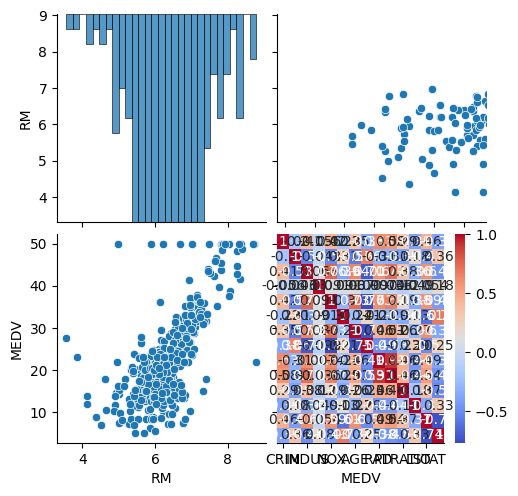

In [64]:
## EDA (Exploratory Data Analysis)
## Only on RM and MEDV beacuse therir correlation os high and meaningful

sns.pairplot(df[['RM', 'MEDV']])
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [65]:
## Predict MEDIAN HOUSE VALUE(MEDV) based on AVERAGE ROOMS PER DWELLING (RM)
x = df[['RM']]
y = df['MEDV']

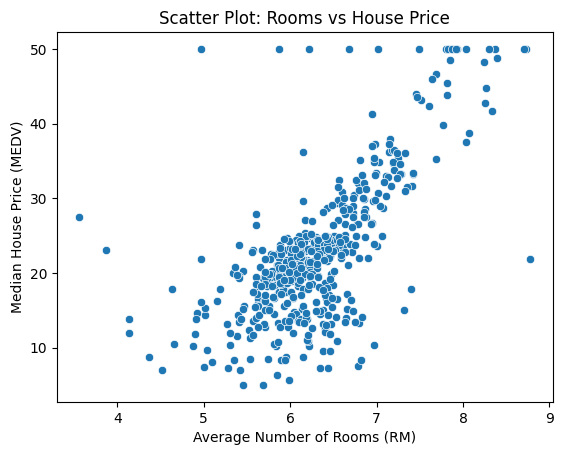

In [66]:
## Scatter Plot : RM vs MEDV

sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title("Scatter Plot: Rooms vs House Price")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median House Price (MEDV)")
plt.show()

In [67]:
## Train_Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [68]:
##Linear  Regression Model

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [17]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (Slope): {model.coef_[0]}")

# Equation: y = mX + b
print(f"Regression Equation: MEDV = {model.coef_[0]:.2f} * RM + {model.intercept_:.2f}")


Intercept: -36.24631889813792
Coefficient (Slope): 9.348301406497722
Regression Equation: MEDV = 9.35 * RM + -36.25


In [13]:
## performing the Model Evaluation

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)


Mean Squared Error: 46.144775347317264
R² Score: 0.3707569232254778
Intercept: -36.24631889813792
Coefficient: [9.34830141]


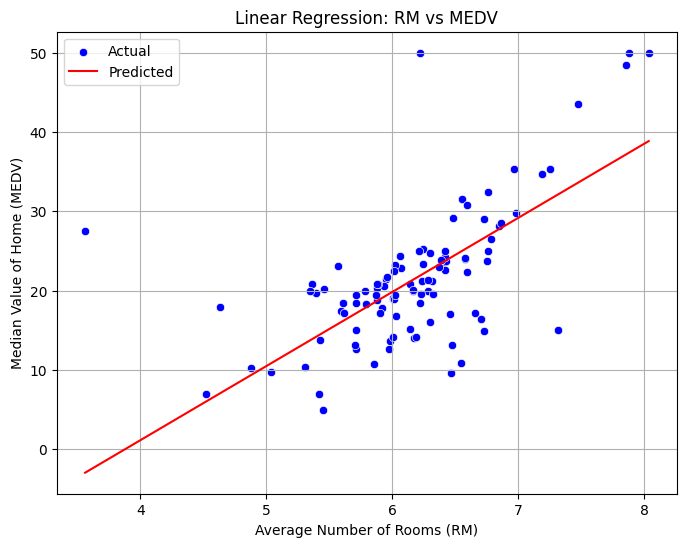

In [14]:
## Visual Performance Evaluation of the Linear regression Model

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['RM'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['RM'], y=y_pred, color='red', label='Predicted')
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median Value of Home (MEDV)")
plt.title("Linear Regression: RM vs MEDV")
plt.legend()
plt.grid(True)
plt.show()


## Blue dots: RM Actual values of house
##Red line : Predicted values based on the linear regression


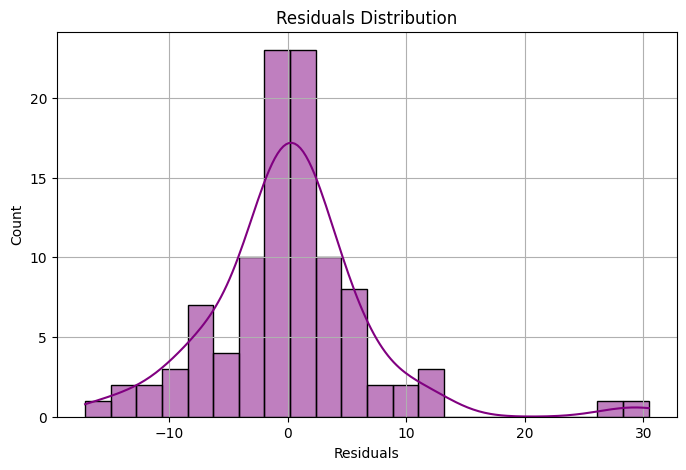

In [19]:
## Residual Plot 
## shows the error in the randomly didtributed

residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()


In [15]:

# Predict for a house with 6 rooms
input_df = pd.DataFrame({'RM': [6]})
predicted_price = model.predict(input_df)

print(f"Predicted price for a house with 6 rooms: {predicted_price[0]:.2f}")


Predicted price for a house with 6 rooms: 19.84


Level_2, Task_2:
## Time series Analysis


In [37]:
import pandas as pd

df_raw= pd.read_csv(r"C:\Users\SRIYAVARDHINI\Downloads\4) house Prediction Data Set.csv", sep=r'\s+', header=None)
print(df_raw.head())



        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [39]:
df = df_raw[0].astype(str).str.split(expand=True)
df = df.apply(pd.to_numeric)

In [41]:
df.index = pd.date_range(start='2020-01-01', periods=len(df), freq='D')
df.rename(columns={13: "MEDV"}, inplace=True)

In [46]:
df = pd.read_csv(r"C:\Users\SRIYAVARDHINI\Downloads\4) house Prediction Data Set.csv", sep=r'\s+', header=None)
print(df.head())
print(df.columns)


        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')


In [48]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24

In [49]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


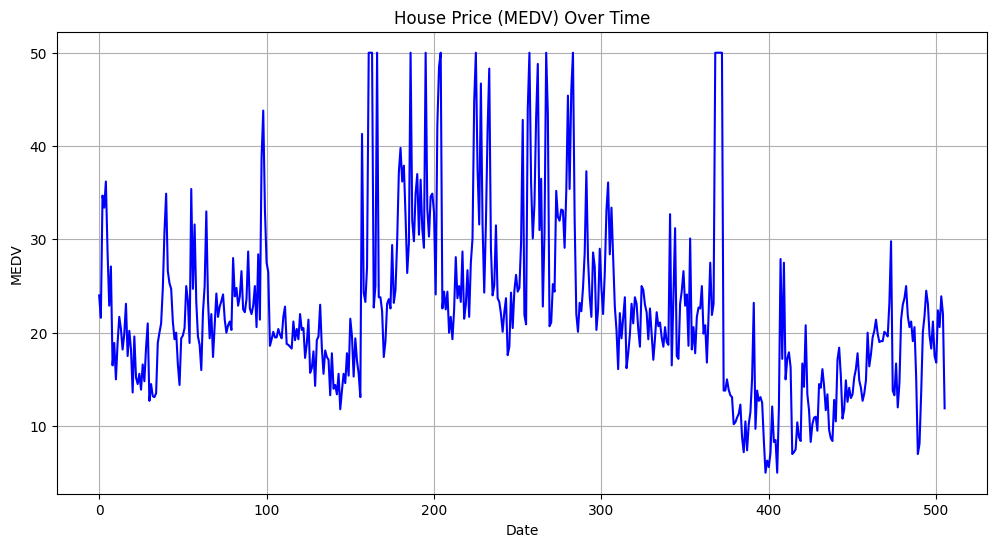

In [69]:
## Visualization of the TIME SERIES DATA ##

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df['MEDV'], color='blue')
plt.title("House Price (MEDV) Over Time")
plt.xlabel("Date")
plt.ylabel("MEDV")
plt.grid(True)
plt.show()

In [70]:
df['MEDV'].isnull().sum()


np.int64(0)

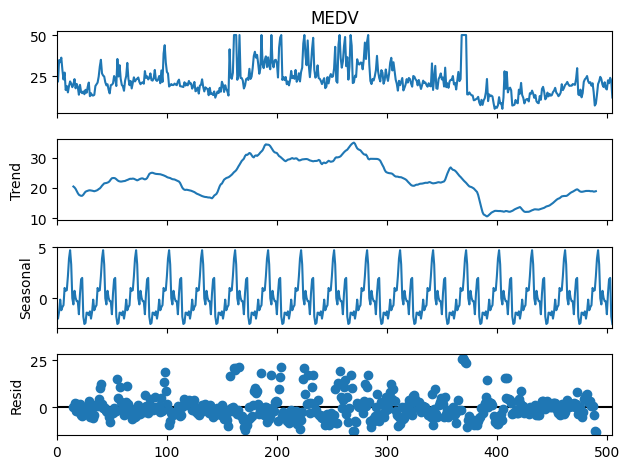

In [71]:
df = df.dropna(subset=['MEDV'])

# Then run seasonal decomposition
result = seasonal_decompose(df['MEDV'], model='additive', period=30)
result.plot()
plt.tight_layout()


In [58]:
df['MEDV'] = df['MEDV'].fillna(method='ffill')

# Then run seasonal decomposition
result = seasonal_decompose(df['MEDV'], model='additive', period=30)
result.plot()
plt.tight_layout()


C:\Users\SRIYAVARDHINI\AppData\Local\Temp\ipykernel_24444\1994373993.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MEDV'] = df['MEDV'].fillna(method='ffill')


ValueError: x must have 2 complete cycles requires 60 observations. x only has 0 observation(s)

In [72]:
## to check the data shape #3
print(df.shape)
print(df['MEDV'].isnull().sum())


(506, 14)
0


In [73]:
## creating a fake time index i.e the data set doesnot have time column
df['Date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')
df.set_index('Date', inplace=True)


In [74]:
df = df.dropna(subset=['MEDV'])


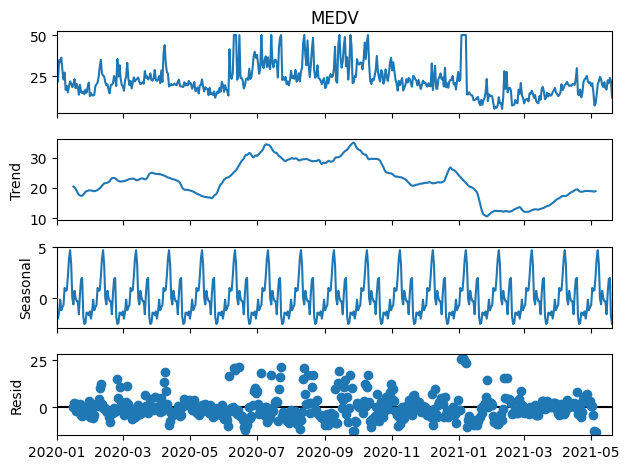

In [75]:
## Decompose the time series ##
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(df['MEDV'], model='additive', period=30)
result.plot()
plt.tight_layout()
plt.show()


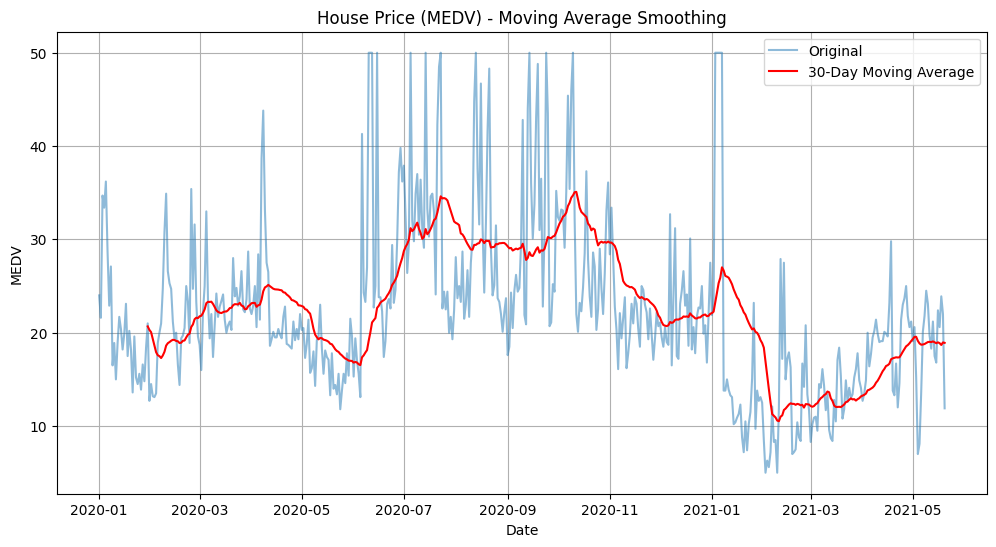

In [76]:
# To smooth the original time series data
## usage: the trends become more visible
## 
df['MEDV_MA30'] = df['MEDV'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df['MEDV'], label='Original', alpha=0.5)
plt.plot(df['MEDV_MA30'], label='30-Day Moving Average', color='red')
plt.title("House Price (MEDV) - Moving Average Smoothing")
plt.xlabel("Date")
plt.ylabel("MEDV")
plt.legend()
plt.grid(True)
plt.show()


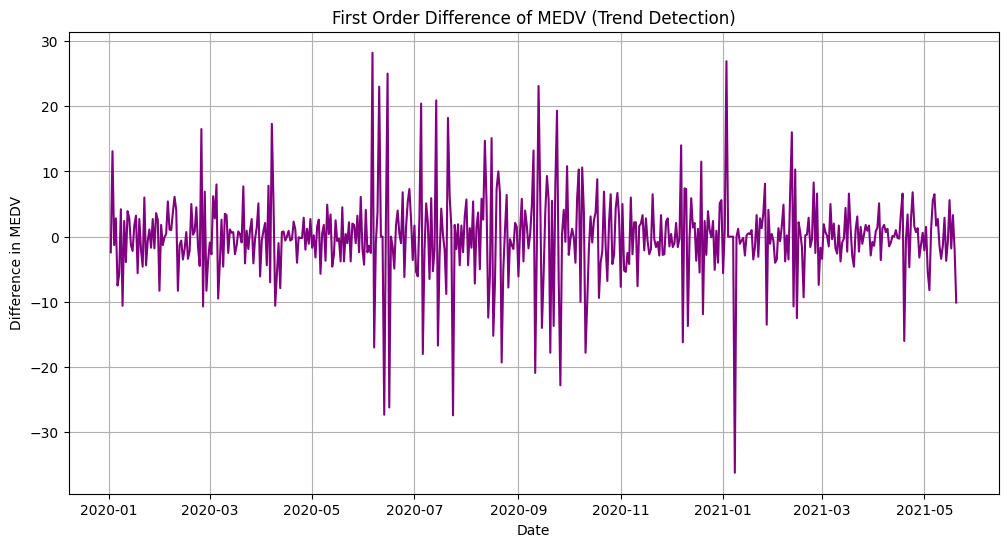

In [77]:
## To calculate the change between the current and previous value
## It will remove the trend, and make the series stationary
df['MEDV_diff'] = df['MEDV'].diff()

plt.figure(figsize=(12,6))
plt.plot(df['MEDV_diff'], color='purple')
plt.title("First Order Difference of MEDV (Trend Detection)")
plt.xlabel("Date")
plt.ylabel("Difference in MEDV")
plt.grid(True)
plt.show()



Level_2, Task_3
## Clustering Analysis(k-Means)

In [82]:
## Standardization ##
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.dropna())  


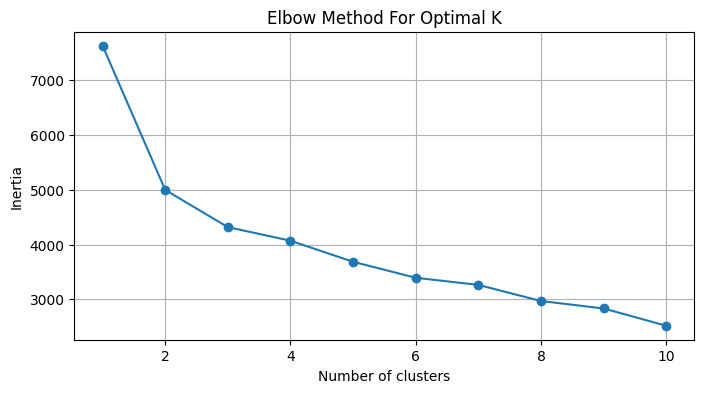

In [79]:
## K-Means + Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [86]:
## K- Means
optimal_k = 3  # Pick based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(scaled_data)


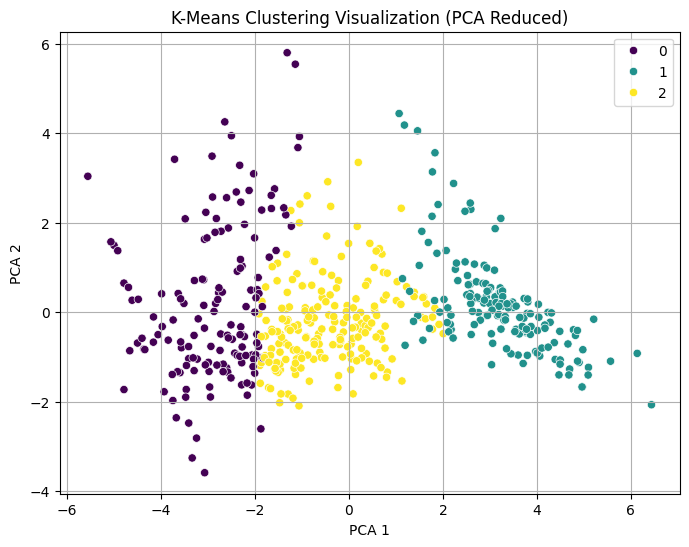

In [85]:
## Visualize the 2D plot Using the PCA
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=labels, palette='viridis')
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()
